## Arrhenius plot and diffusion kinetic parameters for step-heating experiments

This notebook uses the reduced JSON data file of each step-heating experiments from the HAL to create their Arrhenius plots and calculate the diffusion kinetic parameters.

In [280]:
#import packages
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

In [281]:
#defining some constants
gas_constant = 8.314472   # universal gas constant in kJ/K*mol
avogadro = 6.022e+23   # in 1/mol
zirc_rho = 4.65  # zircon density in g/cm^3

### 1. Input sample specific values

In the cell below, input all necessary information for the specific sample.

In [282]:
Sample_ID = 'RS23_G168'

#slab dimensions in microns
width = 88
length_1 = 541
length_2 = 529

#alpha dose
alpha = 2.92e+18  # /gram

half_width = (width/2) / 1e4 # in cm

In [283]:
#calculating volume 

vol = (width * length_1 * length_2) / 1e12  # in cm^3

#calculating volumetric mol of He

He_mol_total = ((vol * zirc_rho) * alpha) / avogadro   # in mol
#vol_He = (1e15 * (vol * zirc_rho) * alpha) / avogadro  # in fmol

#vol_He_sci = "{:e}".format(vol_He)
#print(vol_He_sci)

print(He_mol_total, ' mol')

5.678461197210229e-10  mol


### 2. Import JSON file
Use the script below to read a JSON from a local file. Simply input the name of the JSON file as `filename.json`. IMPORTANT: the file needs to be in the same directory as this notebook.

In [284]:
He_data = pd.read_json('RS23_diff_cell_He_data.json', orient='index')

# adding column name to the respective columns
He_data.reset_index(inplace=True)  # assigning simple index for ease of calculation
He_data.columns =['sample_ID' , 'ncc_4He' , 'ncc_4He_1sig' , 'mol_He' , 'mol_He_1sig' , 'notes' , 'type']

He_data

,sample_ID,ncc_4He,ncc_4He_1sig,mol_He,mol_He_1sig,notes,type
0,RS23_G168_150_1,2.620686,0.023189,1.169218e-13,1.034581e-15,did not finish lasing. a few seconds left,zirc
1,RS23_G168_175_1,2.486688,0.022386,1.109435e-13,9.987445e-16,t = 3600s,zirc
2,RS23_G168_200_1,3.419553,0.028666,1.525633e-13,1.278934e-15,t = 3600s,zirc
3,RS23_G168_225_1,4.902296,0.038660,2.187158e-13,1.724806e-15,t = 3600s,zirc
4,RS23_G168_250_1,6.740781,0.031821,3.007398e-13,1.419710e-15,None,zirc
5,RS23_G168_275_1,16.232395,0.072563,7.242079e-13,3.237377e-15,laser was at 283 +/- 7 *C,zirc
6,RS23_G168_320_1,33.916585,0.261714,1.513188e-12,1.167638e-14,temp unstable,zirc
7,RS23_G168_350_1,46.591793,0.359275,2.078692e-12,1.602902e-14,temp more stable,zirc
8,RS23_G168_375_1,67.212721,0.511238,2.998694e-12,2.280885e-14,None,zirc
9,RS23_G168_400_1,154.726614,1.176776,6.903124e-12,5.250184e-14,overshot to 465-495 w/in first 5 mins,zirc


#### Appending temperature and time (if not included in JSON file)

The easiest way would be to compile the heating temperature and time in an excel file (with column labels) and appending it to the data frame.

In [285]:
#adding new columns from excel
temp_time = pd.read_excel('G168_exampletT.xlsx')

He_data['temp_degC'] = temp_time ['temp_degC'].values
He_data['time_s'] = temp_time ['time_s'].values

He_data

,sample_ID,ncc_4He,ncc_4He_1sig,mol_He,mol_He_1sig,notes,type,temp_degC,time_s
0,RS23_G168_150_1,2.620686,0.023189,1.169218e-13,1.034581e-15,did not finish lasing. a few seconds left,zirc,150,3600
1,RS23_G168_175_1,2.486688,0.022386,1.109435e-13,9.987445e-16,t = 3600s,zirc,175,3600
2,RS23_G168_200_1,3.419553,0.028666,1.525633e-13,1.278934e-15,t = 3600s,zirc,200,3600
3,RS23_G168_225_1,4.902296,0.038660,2.187158e-13,1.724806e-15,t = 3600s,zirc,225,3600
4,RS23_G168_250_1,6.740781,0.031821,3.007398e-13,1.419710e-15,None,zirc,250,3600
5,RS23_G168_275_1,16.232395,0.072563,7.242079e-13,3.237377e-15,laser was at 283 +/- 7 *C,zirc,285,3600
6,RS23_G168_320_1,33.916585,0.261714,1.513188e-12,1.167638e-14,temp unstable,zirc,320,3600
7,RS23_G168_350_1,46.591793,0.359275,2.078692e-12,1.602902e-14,temp more stable,zirc,350,3600
8,RS23_G168_375_1,67.212721,0.511238,2.998694e-12,2.280885e-14,None,zirc,375,3600
9,RS23_G168_400_1,154.726614,1.176776,6.903124e-12,5.250184e-14,overshot to 465-495 w/in first 5 mins,zirc,400,3600


### 3. Making an Arrhenius plot
#### Calculating the fraction released `frac`, cumulative fraction released `f_cum`, and ln(D/${a^2}$) `ln_D_a2` for all the heating steps.

In [286]:
#empty lists that we'll append to
frac = []
ln_D_a2 = []

#calculating just the fraction released at individual steps

for i in range(len(He_data)):
    frac = He_data.mol_He / He_mol_total

He_data['frac'] = frac

#calculating cumulative fraction released and putting it into a new column
He_data['f_cum'] = He_data['frac'].cumsum()

#now calculating ln(D/a^2)
for i in range(len(He_data)):

    if i == 0:
        ln_Da2 = np.log((He_data.f_cum[i] ** 2) * (np.pi / (4 * He_data.time_s[i])))
    
    else:
        ln_Da2 = np.log((np.pi * (He_data.f_cum[i]**2 - He_data.f_cum[i-1]**2)) / (4 * He_data.time_s[i]))
        
    ln_D_a2.append(ln_Da2) 

#adding list into dataframe
He_data['ln_D_a2'] = ln_D_a2

He_data

,sample_ID,ncc_4He,ncc_4He_1sig,mol_He,mol_He_1sig,notes,type,temp_degC,time_s,frac,f_cum,ln_D_a2
0,RS23_G168_150_1,2.620686,0.023189,1.169218e-13,1.034581e-15,did not finish lasing. a few seconds left,zirc,150,3600,0.000206,0.000206,-25.406454
1,RS23_G168_175_1,2.486688,0.022386,1.109435e-13,9.987445e-16,t = 3600s,zirc,175,3600,0.000195,0.000401,-24.377516
2,RS23_G168_200_1,3.419553,0.028666,1.525633e-13,1.278934e-15,t = 3600s,zirc,200,3600,0.000269,0.000670,-23.491227
3,RS23_G168_225_1,4.902296,0.038660,2.187158e-13,1.724806e-15,t = 3600s,zirc,225,3600,0.000385,0.001055,-22.654575
4,RS23_G168_250_1,6.740781,0.031821,3.007398e-13,1.419710e-15,None,zirc,250,3600,0.000530,0.001585,-21.910647
5,RS23_G168_275_1,16.232395,0.072563,7.242079e-13,3.237377e-15,laser was at 283 +/- 7 *C,zirc,285,3600,0.001275,0.002860,-20.510796
6,RS23_G168_320_1,33.916585,0.261714,1.513188e-12,1.167638e-14,temp unstable,zirc,320,3600,0.002665,0.005525,-19.139200
7,RS23_G168_350_1,46.591793,0.359275,2.078692e-12,1.602902e-14,temp more stable,zirc,350,3600,0.003661,0.009186,-18.259565
8,RS23_G168_375_1,67.212721,0.511238,2.998694e-12,2.280885e-14,None,zirc,375,3600,0.005281,0.014466,-17.418239
9,RS23_G168_400_1,154.726614,1.176776,6.903124e-12,5.250184e-14,overshot to 465-495 w/in first 5 mins,zirc,400,3600,0.012157,0.026623,-16.032135


#### Now plotting `ln_D_a2` vs 1e4/T(K)
Temperature is listed as degree C, so we'd need to convert that and divide it by 1e4. In order to be able to easily calculate linear regression and visualize linear vs non-linear trends, we will plot these separately. Therefore, the index number for the last NAB step should be changed for each experiment.

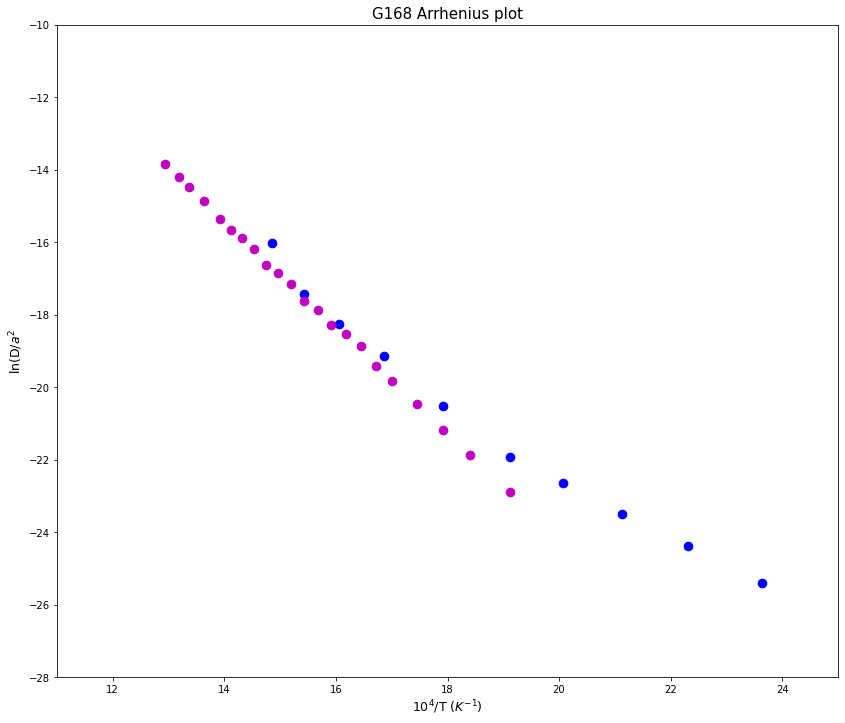

In [287]:
plt.figure(figsize = (14, 12))
plt.xlabel(r'$10^{4}$/T ($K^{-1}$)', fontsize='12.5')
plt.ylabel(r'ln(D/$a^{2}$', fontsize='12.5')
plt.xlim(11, 25)
plt.ylim(-28, -10)
plt.xticks(fontsize=10)
plt.yticks(fontsize=10)
plt.title('G168 Arrhenius plot', fontsize='15')

x_axis1 = 1e4 / (He_data.temp_degC.iloc[:10] + 273.15)
x_axis2 = 1e4 / (He_data.temp_degC.iloc[10:] + 273.15)

ln_D_a2_arr = He_data.ln_D_a2.iloc[10:]

plt.scatter(x_axis1, He_data.ln_D_a2.iloc[:10], color = 'b', s=75)
plt.scatter(x_axis2, He_data.ln_D_a2.iloc[10:], color = 'm', s=75)

#plt.savefig('.pdf') 
plt.show()

### 4. Calculating unweighted regression for Arrhennius plot
First we'll set up the linear regression equations

DON'T FORGET TO CHANGE THE n-value to the number of datapoints to regress!!!

In [288]:
#insert n-value here
n = 22

def ord_lin_regress(X_vals, Y_vals):
    
    #hint: it helps to create arrays for XY values and X^2 (use x**2 to raise something to a power) from your input
    #first create some empty arrays
    
    XY_vals = []
    X2_vals = []
    
    #then try this for loop (remember that Python uses zero indexing):
    
    for i in range(len(X_vals)):
        XY = X_vals[i] * Y_vals[i]
        X2 = X_vals[i]**2
        
        XY_vals.append(XY)
        X2_vals.append(X2)
        
    #now calculate slope and intercept below using the sum function, I'll let you try the math here
    
    slope = (sum(XY_vals) - (sum(X_vals)*sum(Y_vals)/n)) / (sum(X2_vals) - ((sum(X_vals)**2)/n))
    intercept = (sum(X_vals) * sum(XY_vals) - sum(Y_vals) * sum(X2_vals)) / ((sum(X_vals)**2) - n*sum(X2_vals))
    
    return slope, intercept

Now we'll calculate the slope and intercept for the Arrhenius trend. To make things easier we'll make a new dataframe only with the data we want to calculate the linear regression with.

In [289]:
#making new lists. don't forget to change the range of datapoints
x_axis2 = 1e4 / (He_data.temp_degC.iloc[10:] + 273.15)
ln_D_a2_arr = He_data.ln_D_a2.iloc[10:]

arrhenius_data = {'temp': x_axis2, 'ln_D_a2_arr':ln_D_a2_arr}

#making new dataframe and resetting index
arr_data = pd.DataFrame(arrhenius_data)
arr_data.reset_index(inplace=True)

#now we'll do the calculation
arrhenius = ord_lin_regress(arr_data.temp, arr_data.ln_D_a2_arr)

print('The slope is ', arrhenius[0])
print('The intercept is ', arrhenius[1])

The slope is  -1.4603848909706254
The intercept is  5.021075689444895


### 5. Calculate diffusion kinetic parameters  `E_a` and `D_0`
Now we can calculate the diffusion kinetic parameters: activation energy `E_a` and frequency factor `D_0`.

In [290]:
#calculating activation energy and frequency factor

E_a = - gas_constant * arrhenius[0] * 10  # in kJ/mol
D_0 = np.exp(arrhenius[1]) * half_width**2

print('E_a =', E_a, ' kJ/mol.')
print('D_0 =', D_0, ' cm^2/s.')

E_a = 121.42329285198318  kJ/mol.
D_0 = 0.002934477731029488  cm^2/s.


### END (FOR NOW)
misc stuff below

Some random but useful lines of code:

In [291]:
#adding new empty columns
#He_data.insert(loc=4, column='temp_degC', value='')

#appending new values one by one OR to replace an existing one
#He_data.at['RS23_G168_200_1', 'temp_degC'] = 200
#He_data.at['RS23_G168_200_1', 'time_s'] = 3600

#if you need to delete a row/column for some reason
#He_data = He_data.drop(labels="time_s", axis=1)

Calculating fraction and ln(D/${a^2}$) for the first heating step (not needed anymore but just keeping it here)

In [292]:
#calculating first fraction, f_first and ln(D/a^2)

#f_first = He_data.mol_He[0] / He_mol_total
#ln_D_a2 = np.log((f_first**2) * (np.pi / (4 * He_data.time_s[0])))

#print(f_first, ln_D_a2)

#adding columns for frac, f_cum, and ln_D_a2
#He_data['frac'] = ''
#He_data['f_cum'] = ''
#He_data['ln_D_a2'] = ''

#appending to first row of dataframe

#He_data.at['RS23_G168_150_1', 'frac'] = f_first
#He_data.at['RS23_G168_150_1', 'ln_D_a2'] = ln_D_a2

#He_data